In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..')))

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), "../.."))
LOGS_DIR = os.path.join(ROOT_DIR, 'logs')

In [2]:
file_path = ROOT_DIR+'\\data\\processed\\WSN-DS_balance.csv'
df = pd.read_csv(file_path)
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,606079,3053,1,606100,0.00000,1,27,0,0,0,0,0,0,0,0,0.00000,0,0.04985,Grayhole
1,406039,1953,1,406100,0.00000,1,22,0,0,0,0,0,0,0,0,0.00000,0,0.39332,Blackhole
2,303085,1653,0,303006,2.96837,0,13,1,0,0,1,3,0,0,0,0.00000,8,0.00594,Normal
3,402086,2003,1,402100,0.00000,1,25,0,0,0,0,0,0,0,0,0.00000,0,0.05020,Grayhole
4,603098,2753,1,603100,0.00000,1,10,0,1,1,0,0,0,234,234,126.74493,0,2.48271,TDMA


Iteration 1: Best Score = 0.8907036148308692
Iteration 2: Best Score = 0.8907036148308692
Iteration 3: Best Score = 0.8933353974765849
Iteration 4: Best Score = 0.8933353974765849
Iteration 5: Best Score = 0.8933353974765849
Iteration 6: Best Score = 0.8933353974765849
Iteration 7: Best Score = 0.8933353974765849
Iteration 8: Best Score = 0.8951931264029723
Iteration 9: Best Score = 0.8951931264029723
Iteration 10: Best Score = 0.8957349640065021
Iteration 11: Best Score = 0.8957349640065021
Iteration 12: Best Score = 0.8957349640065021
Iteration 13: Best Score = 0.8957349640065021
Iteration 14: Best Score = 0.8959671801223005
Iteration 15: Best Score = 0.8959671801223005
Iteration 16: Best Score = 0.8959671801223005
Iteration 17: Best Score = 0.8959671801223005
Iteration 18: Best Score = 0.8965864230977629
Iteration 19: Best Score = 0.8965864230977629
Iteration 20: Best Score = 0.8965864230977629
Iteration 21: Best Score = 0.8965864230977629
Iteration 22: Best Score = 0.89658642309776

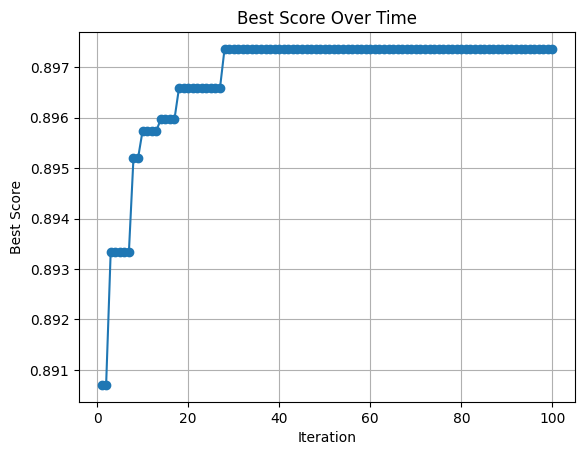

Best Feature Subset: [1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0]
Best Score: 0.8973604768170911


In [6]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
features, labels = load_data(file_path)

# Scale features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Objective function: Evaluate classification accuracy
def fitness_function(position, features, labels):
    selected_features = features[:, position.astype(bool)]
    if selected_features.shape[1] == 0:  # No features selected
        return 0
    X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

# Binary PSO for feature selection with best score tracking
def binary_pso(features, labels, num_particles=30, max_iter=100, w=0.7, c1=1.5, c2=1.5):
    num_features = features.shape[1]
    positions = np.random.randint(0, 2, (num_particles, num_features))  # Random binary positions
    velocities = np.random.uniform(-1, 1, (num_particles, num_features))  # Random velocities
    pbest_positions = positions.copy()
    pbest_scores = np.array([fitness_function(p, features, labels) for p in positions])
    gbest_position = pbest_positions[np.argmax(pbest_scores)]
    gbest_score = np.max(pbest_scores)

    best_scores_over_time = []  # To store the best score at each iteration

    for iteration in range(max_iter):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (pbest_positions[i] - positions[i]) +
                             c2 * r2 * (gbest_position - positions[i]))
            # Sigmoid and binary update
            probabilities = 1 / (1 + np.exp(-velocities[i]))
            positions[i] = (np.random.rand(num_features) < probabilities).astype(int)

            # Update personal best
            fitness = fitness_function(positions[i], features, labels)
            if fitness > pbest_scores[i]:
                pbest_positions[i] = positions[i]
                pbest_scores[i] = fitness

        # Update global best
        best_particle_index = np.argmax(pbest_scores)
        if pbest_scores[best_particle_index] > gbest_score:
            gbest_position = pbest_positions[best_particle_index]
            gbest_score = pbest_scores[best_particle_index]

        best_scores_over_time.append(gbest_score)  # Save the current global best score
        print(f"Iteration {iteration + 1}: Best Score = {gbest_score}")

    return gbest_position, gbest_score, best_scores_over_time

# Run the PSO
best_position, best_score, best_scores_over_time = binary_pso(features, labels)

mean_score = np.mean(best_scores_over_time)
std_score = np.std(best_scores_over_time)

# Plot the best score over time
plt.plot(range(1, len(best_scores_over_time) + 1), best_scores_over_time, marker='o')
plt.title("Best Score Over Time")
plt.xlabel("Iteration")
plt.ylabel("Best Score")
plt.grid()
plt.show()

print("Best Feature Subset:", best_position)
print("Best Score:", best_score)
# 80m 29.8s

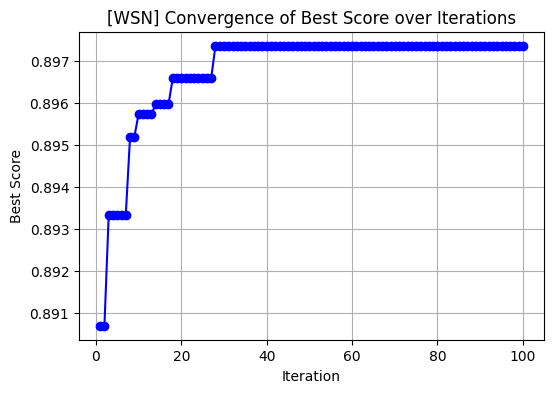

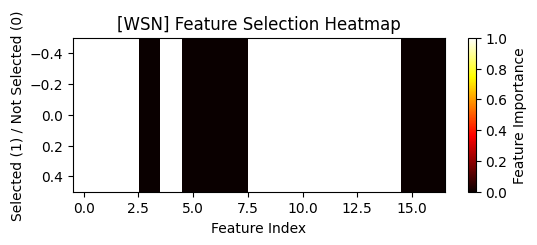



Mean Best Score: 0.896784580849911
Standard Deviation of Best Score: 0.0013045650713561978



In [8]:
print("")
print("="*110)
plt.figure(figsize=(6, 4))
plt.plot(range(1, 100 + 1), best_scores_over_time, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Best Score')
plt.title('[WSN] Convergence of Best Score over Iterations')
plt.grid()
plt.show()

# Visualize best position in a feature heatmap
plt.figure(figsize=(6, 2))
plt.imshow(best_position.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Feature Importance')
plt.title('[WSN] Feature Selection Heatmap')
plt.xlabel('Feature Index')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.show()

# Print results
print("")
print("="*110)
print("")
print("Mean Best Score:", mean_score)
print("Standard Deviation of Best Score:", std_score)
# print("Mean Classification Accuracy:", mean_accuracy)
# print("Standard Deviation of Classification Accuracy:", std_accuracy)
print("")
print("="*110)


In [9]:
features_col = df.columns.to_list()
selected_features = [features_col[i] for i in range(len(best_position)) if best_position[i] == 1]
non_selected_features = [features_col[i] for i in range(len(best_position)) if best_position[i] == 0]

print(f"Selected Features:\n{selected_features}")
print(f"Non-Selected Features:\n{non_selected_features}")


Selected Features:
[' id', ' Time', ' Is_CH', ' Dist_To_CH', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R', ' Data_Sent_To_BS']
Non-Selected Features:
[' who CH', ' ADV_S', ' ADV_R', ' JOIN_S', ' dist_CH_To_BS', ' send_code ']
